### car Resale Analysis Regression

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-resale-prices/car_resale_prices.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
resale_data = pd.read_csv("/kaggle/input/car-resale-prices/car_resale_prices.csv")

In [4]:
resale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17446 non-null  int64  
 1   full_name          17446 non-null  object 
 2   resale_price       17446 non-null  object 
 3   registered_year    17377 non-null  object 
 4   engine_capacity    17432 non-null  object 
 5   insurance          17439 non-null  object 
 6   transmission_type  17446 non-null  object 
 7   kms_driven         17443 non-null  object 
 8   owner_type         17401 non-null  object 
 9   fuel_type          17446 non-null  object 
 10  max_power          17344 non-null  object 
 11  seats              17436 non-null  float64
 12  mileage            16938 non-null  object 
 13  body_type          17446 non-null  object 
 14  city               17446 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 2.0+ MB


In [5]:
resale_data.describe()

,Unnamed: 0,seats
count,17446.000000,17436.000000
mean,8722.500000,5.205494
std,5036.370734,0.669321
min,0.000000,2.000000
25%,4361.250000,5.000000
50%,8722.500000,5.000000
75%,13083.750000,5.000000
max,17445.000000,14.000000


In [6]:
resale_data.shape

(17446, 15)

In [7]:
resale_data.isnull().sum()

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64

In [8]:
resale_data['registered_year'] = resale_data['full_name'].apply(lambda x: x.split(' ')[0]).astype(float)


In [9]:
resale_data['registered_year'].isnull().sum()

0

In [10]:
resale_data.dropna(inplace=True)

In [11]:
resale_data.isnull().sum()

Unnamed: 0           0
full_name            0
resale_price         0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
dtype: int64

In [12]:
resale_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 17445
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         16808 non-null  int64  
 1   full_name          16808 non-null  object 
 2   resale_price       16808 non-null  object 
 3   registered_year    16808 non-null  float64
 4   engine_capacity    16808 non-null  object 
 5   insurance          16808 non-null  object 
 6   transmission_type  16808 non-null  object 
 7   kms_driven         16808 non-null  object 
 8   owner_type         16808 non-null  object 
 9   fuel_type          16808 non-null  object 
 10  max_power          16808 non-null  object 
 11  seats              16808 non-null  float64
 12  mileage            16808 non-null  object 
 13  body_type          16808 non-null  object 
 14  city               16808 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 2.1+ MB


In [13]:
resale_data.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009.0,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


## Formatting Numarical Data

In [14]:
num_cols = ['seats','registered_year']

# Numarical Price

In [15]:
def format_price(resale_price):
    split = resale_price.split(' ')
    k = len(split)
    if(k == 2):
        return float(str(split[1]).replace(',', ''))
    elif(split[-1] == 'Lakh'):
        return float(str(split[1]))*100000
    return float(str(split[1]))*10000000

resale_data['num_price'] = resale_data['resale_price'].apply(format_price)
num_cols.append('num_price')
resale_data.head(5)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,545000.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,1000000.0
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,450000.0
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,450000.0
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009.0,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,160000.0


In [16]:
def format_kms(kms_driven):
    if kms_driven.split(' ')[1] != 'Kms':
        print(kms_driven.split(' ')[1])
    return float(str(kms_driven.split(' ')[0]).replace(',', ''))

resale_data['num_kms'] = resale_data['kms_driven'].apply(format_kms)
num_cols.append('num_kms')
resale_data.head(5)


,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,545000.0,40000.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,1000000.0,70000.0
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,450000.0,70000.0
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,450000.0,70000.0
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009.0,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,160000.0,80000.0


In [17]:
def format_engine(engine_capacity):
    if engine_capacity.split(' ')[1] != 'cc':
        print(engine_capacity.split(' ')[1])
    return float(str(engine_capacity.split(' ')[0]))

resale_data['num_engine'] = resale_data['engine_capacity'].apply(format_engine)
num_cols.append('num_engine')
resale_data.head(5)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms,num_engine
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra,545000.0,40000.0,1197.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra,1000000.0,70000.0,2179.0
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,450000.0,70000.0,1197.0
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra,450000.0,70000.0,1197.0
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009.0,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra,160000.0,80000.0,1086.0


In [18]:
resale_data['max_power'].apply(lambda x: x[-3:]).value_counts()

max_power
bhp    16131
rpm      253
 PS       78
102       31
78        23
       ...  
6.7        1
5.2        1
47         1
9PS        1
4.9        1
Name: count, Length: 73, dtype: int64

In [19]:
resale_data = resale_data.drop(resale_data[resale_data['max_power'].apply(lambda x: x[-3:]).str.lower() != 'bhp'].index)

In [20]:
resale_data['max_power'] = resale_data['max_power'].apply(lambda x : x[:-3]).astype(float)

num_cols.append('max_power')

resale_data.head(5)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms,num_engine
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.10,5.0,21.4 kmpl,Hatchback,Agra,545000.0,40000.0,1197.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86,7.0,17.6 kmpl,MUV,Agra,1000000.0,70000.0,2179.0
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14,5.0,20.85 kmpl,Sedan,Agra,450000.0,70000.0,1197.0
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14,5.0,20.85 kmpl,Sedan,Agra,450000.0,70000.0,1197.0
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009.0,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05,5.0,19.81 kmpl,Hatchback,Agra,160000.0,80000.0,1086.0


In [21]:
resale_data['mileage'].apply(lambda x: x.split(' ')[-1]).value_counts()

mileage
kmpl     15993
km/kg      151
Name: count, dtype: int64

In [22]:
resale_data.drop(resale_data[resale_data['mileage'].apply(lambda x: x.split(' ')[-1]).str.lower() != 'kmpl'].index, inplace = True)

In [23]:
resale_data['mileage'] = resale_data['mileage'].apply(lambda x: str(x).split(' ')[0] if isinstance(x, str) else x)

# Convert the cleaned mileage to float, handling errors for any non-numeric values
resale_data['mileage'] = pd.to_numeric(resale_data['mileage'], errors='coerce')

num_cols.append('mileage')

# Display the first two rows of the DataFrame
resale_data.head(2)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms,num_engine
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.10,5.0,21.4,Hatchback,Agra,545000.0,40000.0,1197.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86,7.0,17.6,MUV,Agra,1000000.0,70000.0,2179.0


In [24]:
resale_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15993 entries, 0 to 17445
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15993 non-null  int64  
 1   full_name          15993 non-null  object 
 2   resale_price       15993 non-null  object 
 3   registered_year    15993 non-null  float64
 4   engine_capacity    15993 non-null  object 
 5   insurance          15993 non-null  object 
 6   transmission_type  15993 non-null  object 
 7   kms_driven         15993 non-null  object 
 8   owner_type         15993 non-null  object 
 9   fuel_type          15993 non-null  object 
 10  max_power          15993 non-null  float64
 11  seats              15993 non-null  float64
 12  mileage            15993 non-null  float64
 13  body_type          15993 non-null  object 
 14  city               15993 non-null  object 
 15  num_price          15993 non-null  float64
 16  num_kms            15993 no

In [25]:
num_cols

['seats',
 'registered_year',
 'num_price',
 'num_kms',
 'num_engine',
 'max_power',
 'mileage']

In [26]:
num_encoded = resale_data[num_cols].copy()
num_encoded.head()


,seats,registered_year,num_price,num_kms,num_engine,max_power,mileage
0,5.0,2017.0,545000.0,40000.0,1197.0,83.10,21.40
1,7.0,2018.0,1000000.0,70000.0,2179.0,153.86,17.60
2,5.0,2015.0,450000.0,70000.0,1197.0,83.14,20.85
3,5.0,2015.0,450000.0,70000.0,1197.0,83.14,20.85
4,5.0,2009.0,160000.0,80000.0,1086.0,68.05,19.81


In [27]:
resale_data.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,num_price,num_kms,num_engine
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017.0,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra,545000.0,40000.0,1197.0
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018.0,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86,7.0,17.60,MUV,Agra,1000000.0,70000.0,2179.0
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,450000.0,70000.0,1197.0
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015.0,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,450000.0,70000.0,1197.0
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009.0,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra,160000.0,80000.0,1086.0


In [28]:
resale_data['city'].value_counts()

city
Delhi         2783
Bangalore     2166
Mumbai        1893
Hyderabad     1456
Pune          1245
Chennai       1244
Ahmedabad     1229
Kolkata       1089
Gurgaon        978
Jaipur         821
Lucknow        512
Chandigarh     401
Agra           176
Name: count, dtype: int64

In [29]:
resale_data = resale_data.groupby('body_type').filter(lambda x : len(x) > 45)
resale_data['body_type'].value_counts()

body_type
Hatchback    6869
Sedan        4380
SUV          3968
MUV           671
Minivans       46
Name: count, dtype: int64

In [30]:
resale_data['fuel_type'].value_counts()

fuel_type
Petrol      10544
Diesel       5060
CNG           307
LPG            19
Electric        4
Name: count, dtype: int64

# Owner type

In [31]:
resale_data['owner_type'].value_counts()

owner_type
First Owner     11384
Second Owner     3758
Third Owner       667
Fourth Owner       95
Fifth Owner        30
Name: count, dtype: int64

In [32]:
resale_data['transmission_type'].value_counts()

transmission_type
Manual       11466
Automatic     4468
Name: count, dtype: int64

## Insurance

In [33]:
resale_data['insurance'].value_counts()

insurance
Third Party insurance    6722
Comprehensive            5968
Third Party              1870
Zero Dep                  797
Not Available             569
1                           5
2                           3
Name: count, dtype: int64

In [34]:
resale_data = resale_data.groupby('insurance').filter(lambda x: len(x) > 200)
resale_data['insurance'].value_counts()

insurance
Third Party insurance    6722
Comprehensive            5968
Third Party              1870
Zero Dep                  797
Not Available             569
Name: count, dtype: int64

## one hot encoding

In [35]:
categorical_columns = ['city', 'body_type', 'fuel_type', 'owner_type', 'insurance', 'transmission_type']

In [36]:
#using machine learning 


In [37]:
from sklearn.preprocessing import OneHotEncoder

cat_encoded = pd.get_dummies(resale_data[categorical_columns])
cat_encoded.head()

,city_Agra,city_Ahmedabad,city_Bangalore,city_Chandigarh,city_Chennai,city_Delhi,city_Gurgaon,city_Hyderabad,city_Jaipur,city_Kolkata,...,owner_type_Fourth Owner,owner_type_Second Owner,owner_type_Third Owner,insurance_Comprehensive,insurance_Not Available,insurance_Third Party,insurance_Third Party insurance,insurance_Zero Dep,transmission_type_Automatic,transmission_type_Manual
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


# company name and model name

In [38]:
resale_data['model'] = resale_data['full_name'].apply(lambda x: x.split(' ')[1] + " " + x.split(' ')[2])
resale_data['model'].nunique()

223

In [39]:
model_encoded = pd.get_dummies(resale_data['model'])

In [40]:
model_encoded.head()

,Audi A3,Audi A4,Audi A6,Audi A8,Audi Q3,Audi Q5,Audi Q7,Audi S5,BMW 1,BMW 2,...,Volkswagen Tiguan,Volkswagen Touareg,Volkswagen Vento,Volkswagen Virtus,Volvo S60,Volvo S90,Volvo V40,Volvo XC,Volvo XC40,Volvo XC60
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Merging all data



In [41]:
resale_data = pd.concat([resale_data[num_encoded.columns], cat_encoded, model_encoded], axis=1)

# Exploratory data analysis

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


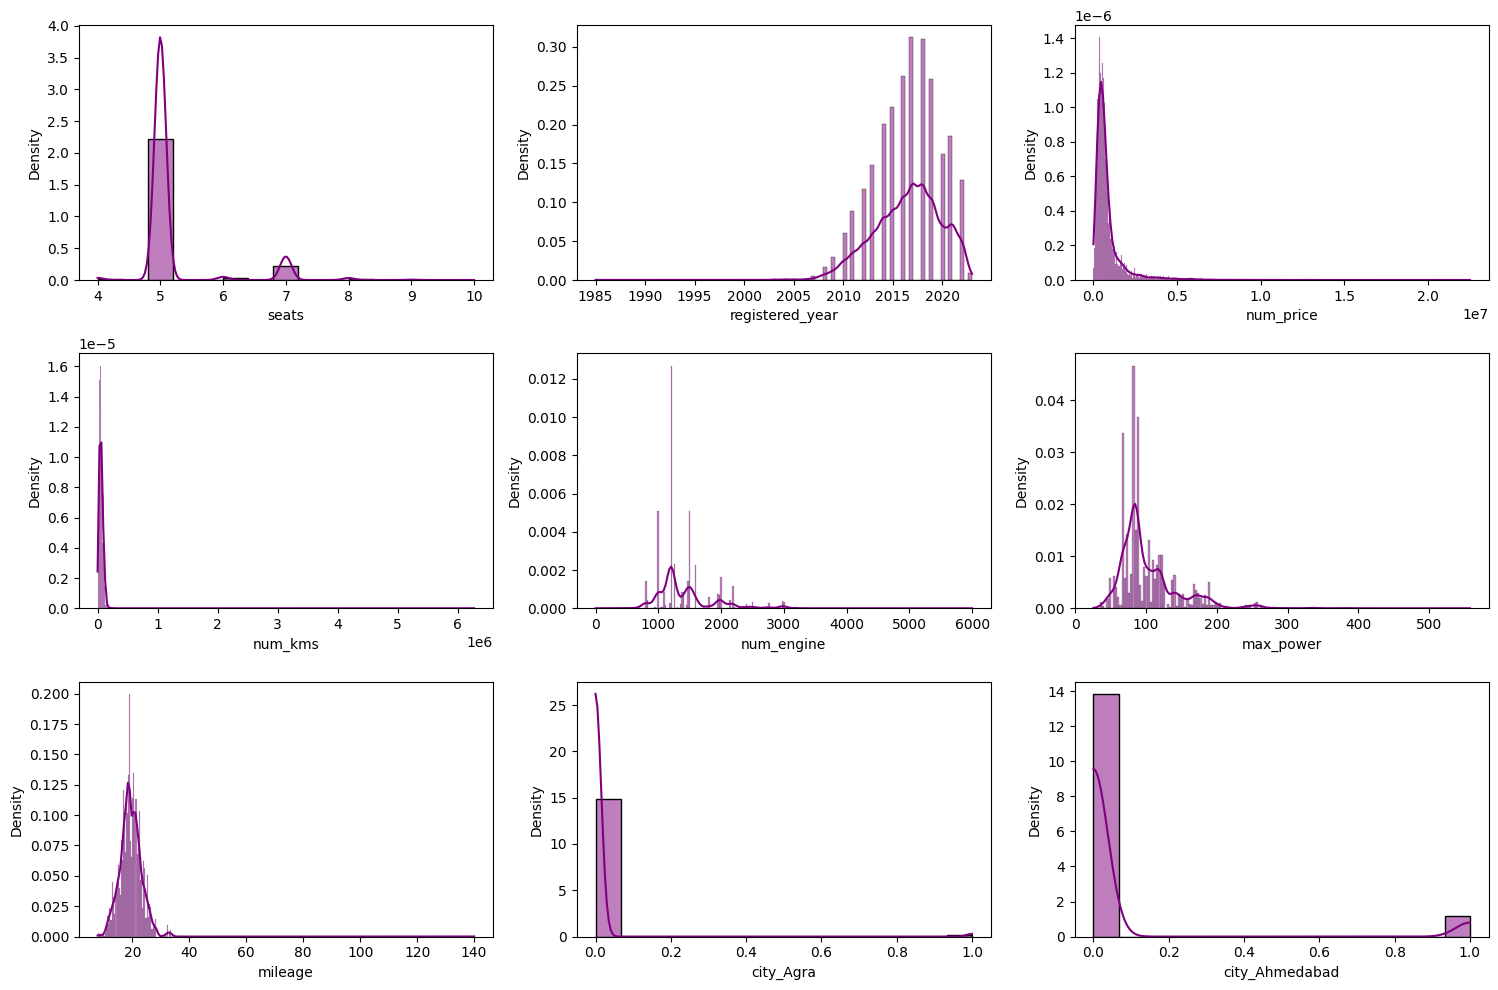

In [43]:
fig, ax1 = plt.subplots(3, 3, figsize=(15, 10))
k = 0
columns =resale_data.columns[:9]
for i in range(3):
    for j in range(3):
        if k < len(columns):  # Check if k is within the bounds of columns
            sns.histplot(resale_data[columns[k]], ax=ax1[i][j], color='purple', kde=True, stat="density")
            k += 1
        else:
            ax1[i][j].set_visible(False)  # Hide unused subplots if fewer than 9 columns

plt.tight_layout()  # Adjust layout
plt.show()   


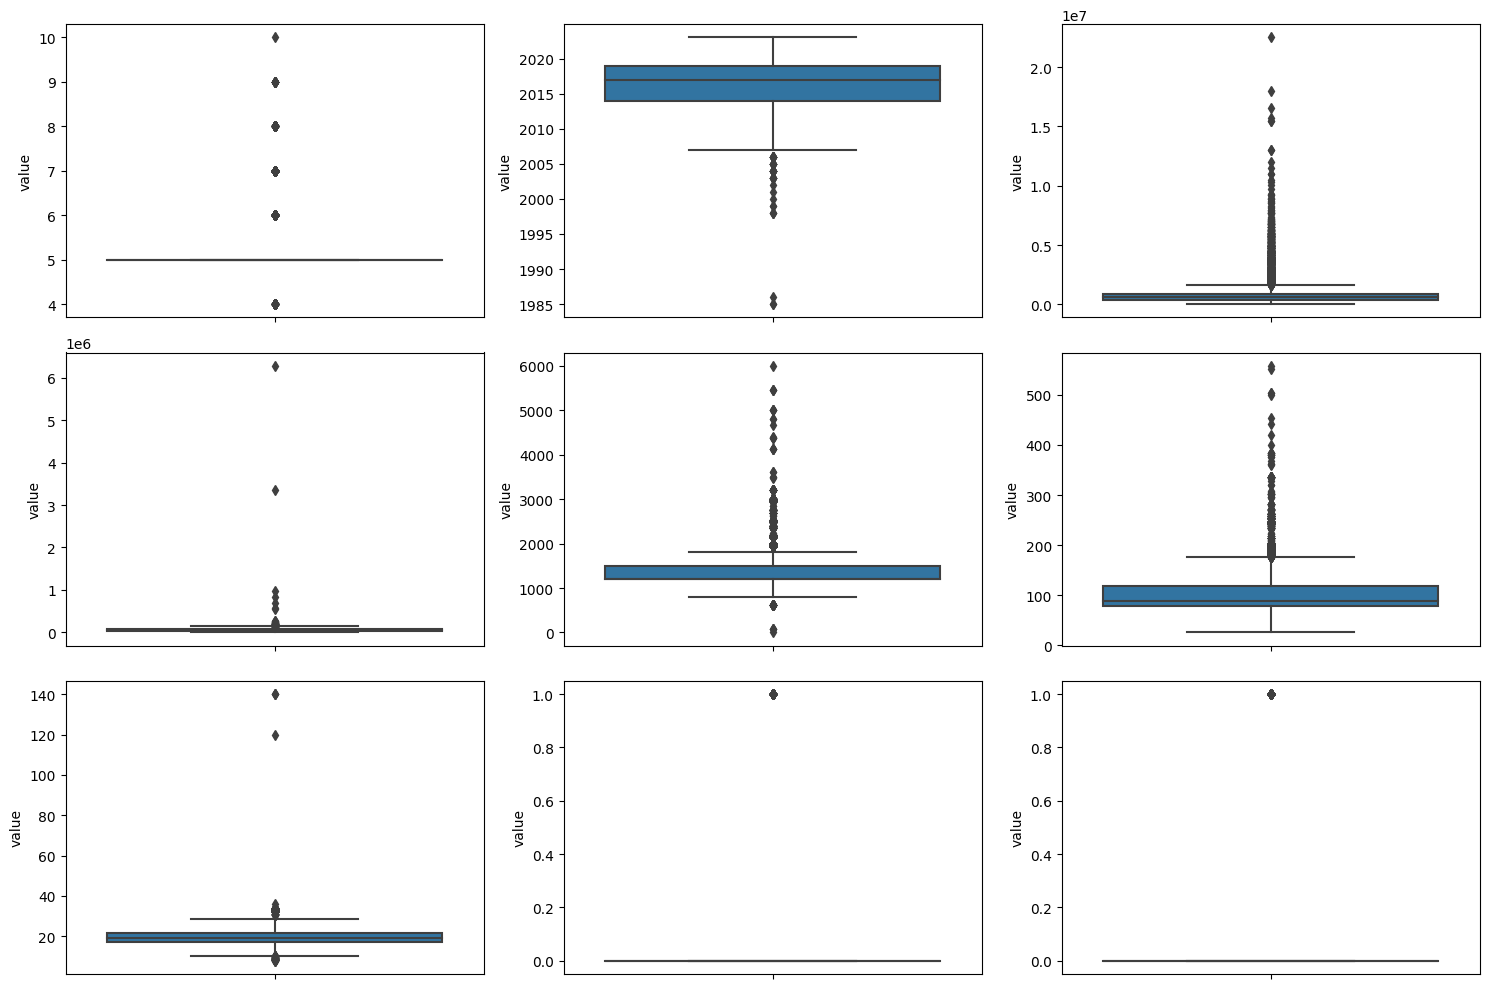

In [44]:
melted_df = pd.melt(resale_data, var_name='variable', value_name='value')

# Assuming 'columns' contains the column names you want to plot
columns = melted_df['variable'].unique()  # Extract unique variable names from melted_df

# Create subplots
fig, ax1 = plt.subplots(3, 3, figsize=(15, 10))
col = 0

for i in range(3):
    for j in range(3):
        if col < len(columns):  # Check if col is within the bounds of columns
            sns.boxplot(y='value', data=melted_df[melted_df['variable'] == columns[col]], ax=ax1[i][j], orient='v')
            col += 1
        else:
            ax1[i][j].set_visible(False)  # Hide unused subplots if fewer than 9 columns

plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

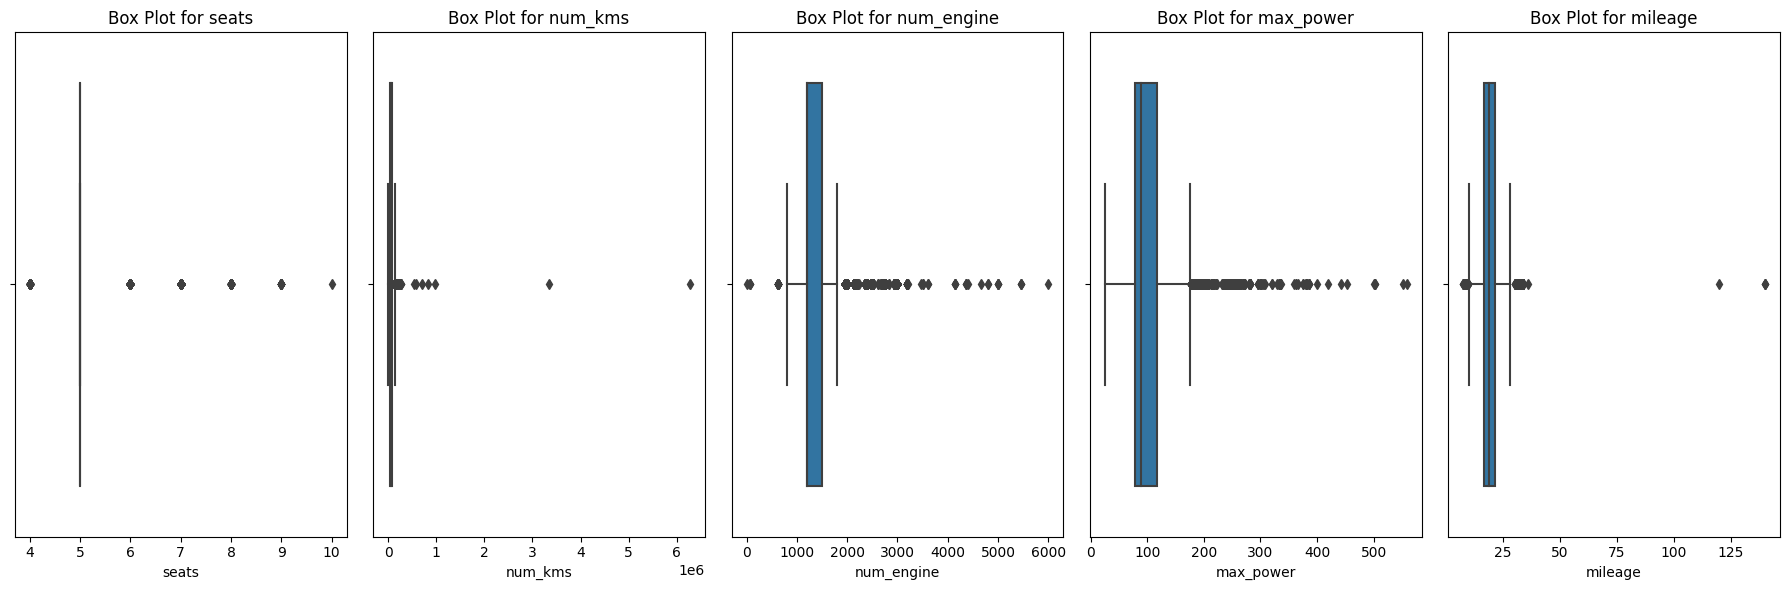

In [45]:

# Define the columns you want to create box plots for
skewed_cols = ['seats', 'num_kms', 'num_engine', 'max_power', 'mileage']

# Filter the columns that exist in the DataFrame
existing_cols = [col for col in skewed_cols if col in resale_data.columns]

# Create a figure with subplots
fig, axes = plt.subplots(1, len(existing_cols), figsize=(18, 6))

# Loop through the existing columns and create box plots
for i, col in enumerate(existing_cols):
    sns.boxplot(x=resale_data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_xlabel(col)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


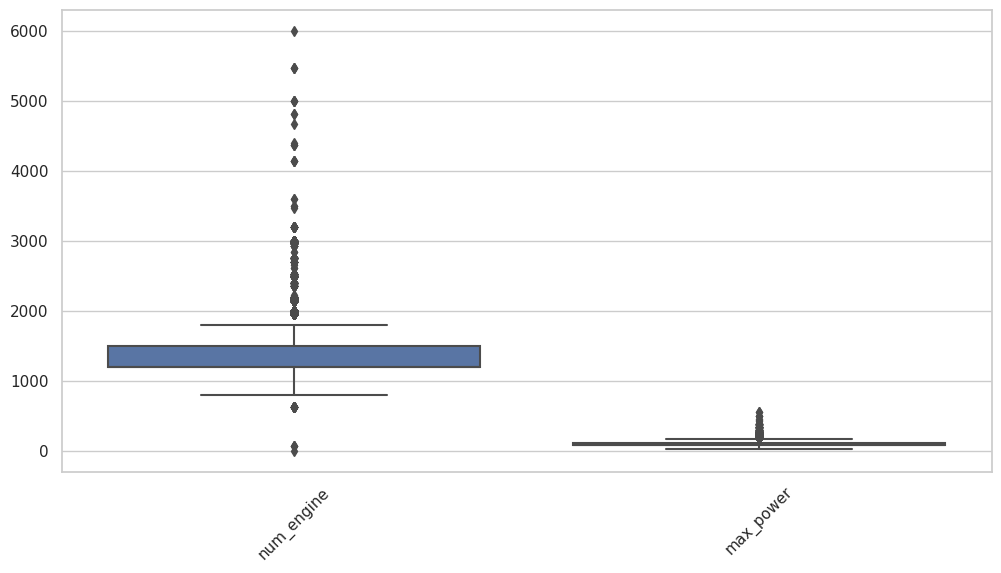

In [46]:
# Assuming you have a DataFrame named df
# Define the columns you want to create a box plot for
columns_to_plot = ['num_engine', 'max_power']

# Check if the columns exist in the DataFrame
missing_columns = [col for col in columns_to_plot if col not in resale_data.columns]

if missing_columns:
    # Print a message indicating which columns are missing
    print(f"Missing columns: {missing_columns}")
else:
    # Create a box plot for the selected columns
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")
    sns.boxplot(data=resale_data[columns_to_plot], orient="vertical")
    plt.xticks(rotation=45)
    plt.show()


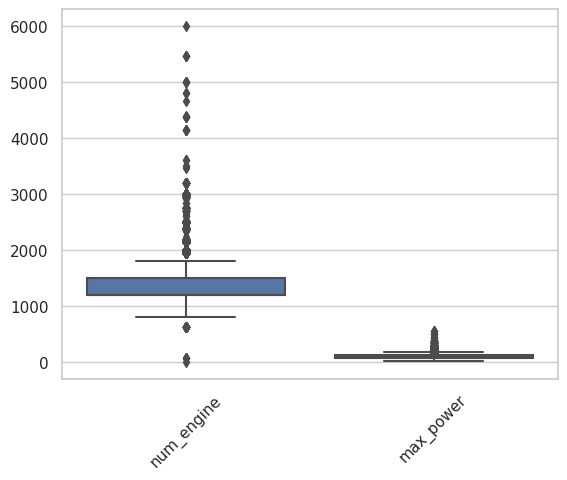

In [47]:
required_columns = ['num_engine', 'max_power']
missing_columns = [col for col in required_columns if col not in resale_data.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Create a box plot for the selected columns
    sns.set(style="whitegrid")
    plt.xticks(rotation=45)
    sns.boxplot(data=resale_data[required_columns])
    plt.show()

## ML Modelling

In [48]:
scalable_cols = num_cols.remove('num_price')

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
y = resale_data['num_price']
X = resale_data.drop('num_price', axis = 1)

X.shape

(15926, 264)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))


X_train : (12740, 264)
X_test : (3186, 264)


In [52]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_predict)
lin_rmse = np.sqrt(lin_mse)
print("MSE: " , lin_mse)
print("RMSE: " , lin_rmse)

from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

score = r2_score(y_train, lin_reg.predict(X_train))
print("The accuracy of our training data is {}%".format(round(score, 2) *100))

MSE:  125269895164.81548
RMSE:  353934.87418565503
The accuracy of our model is 84.0%
The accuracy of our training data is 82.0%


In [54]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor(max_depth = 10, random_state = 45)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=45)

In [55]:
y_predict = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_predict)
tree_rmse = np.sqrt(tree_mse)
print("MSE: " , tree_mse)
print("RMSE: " , tree_rmse)
score2 = r2_score(y_test, y_predict)
print("The accuracy of our model is {}%".format(round(score2, 2) *100))

score2 = r2_score(y_train, tree_reg.predict(X_train))
print("The accuracy of our training data is {}%".format(round(score2, 2) *100))

MSE:  94718683164.43837
RMSE:  307764.00563489937
The accuracy of our model is 88.0%
The accuracy of our training data is 97.0%
